In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df1=pd.read_excel('train_agriculture.xlsx')
df2=pd.read_excel('test_agriculture.xlsx')

In [4]:
df1.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
df2.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [6]:
print('Train_data:',df1.shape)
print('\n')
print('Test_data:',df2.shape)

Train_data: (4599, 10)


Test_data: (1199, 9)


# Train Data

In [7]:
df1.shape

(4599, 10)

In [8]:
df1.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

# Checking Null value

In [9]:
df1.isnull().values.any()

True

In [10]:
df1.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

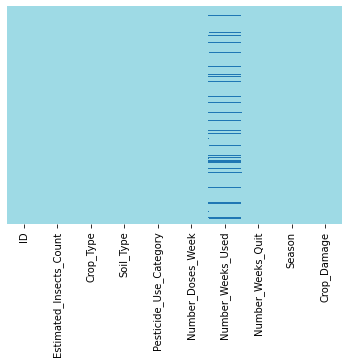

In [11]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='tab20_r')
plt.show()

# Treating Null Value

In [12]:
df1.dropna(subset=["Number_Weeks_Used"],axis=0,inplace=True)

In [13]:
df1.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [14]:
df1.shape

(4157, 10)

# Statistical Value

In [15]:
df1.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,1368.286264,0.225403,0.475343,2.282175,26.528747,28.891027,9.293481,1.891989,0.191484
std,815.550890,0.417898,0.499452,0.471010,15.651629,12.586005,9.753605,0.696910,0.452663
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,732.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [16]:
df1.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.039040,-0.156353,-0.035732,-0.124894,0.449470,0.249871,-0.015429,0.196067
Crop_Type,-0.039040,1.000000,-0.174532,0.355242,-0.165631,-0.002237,-0.272315,0.001822,0.027448
Soil_Type,-0.156353,-0.174532,1.000000,0.020889,0.051378,-0.098399,-0.037584,0.003753,-0.057868
Pesticide_Use_Category,-0.035732,0.355242,0.020889,1.000000,-0.007122,0.387982,-0.570960,0.010773,0.202449
Number_Doses_Week,-0.124894,-0.165631,0.051378,-0.007122,1.000000,0.104022,-0.032430,-0.006366,-0.017724
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.249871,-0.272315,-0.037584,-0.570960,-0.032430,-0.467386,1.000000,0.002753,-0.155354
Season,-0.015429,0.001822,0.003753,0.010773,-0.006366,-0.011108,0.002753,1.000000,-0.016798
Crop_Damage,0.196067,0.027448,-0.057868,0.202449,-0.017724,0.244988,-0.155354,-0.016798,1.000000


# EDA 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0B8DD160>,
      dtype=object)

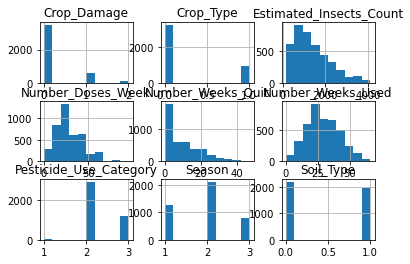

In [17]:
df1.hist()

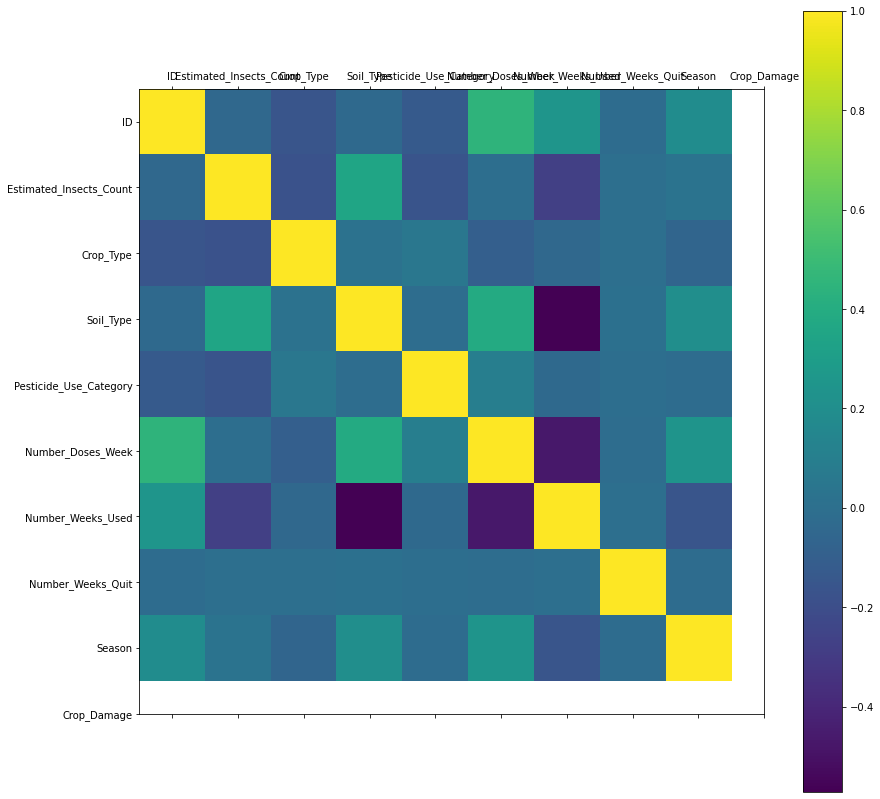

In [18]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 14
plt.matshow(df1.corr())
plt.yticks(np.arange(df1.shape[1]), df1.columns)
plt.xticks(np.arange(df1.shape[1]), df1.columns)
plt.colorbar()

Text(0.5, 1.0, 'Count of each Target Class')

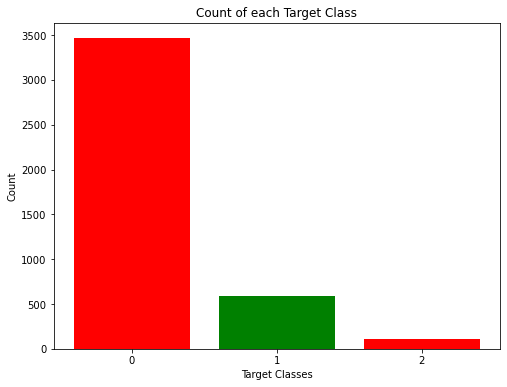

In [19]:
rcParams['figure.figsize'] = 8,6
plt.bar(df1['Crop_Damage'].unique(), df1['Crop_Damage'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1, 2])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

# According to Above Analysis most corp will be Healthy (alive)

In [20]:
df1.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

# Machine Learning

In [21]:
y = df1['Crop_Damage']
X = df1.drop(['Crop_Damage'], axis= 1)
X_train, X_test, y_train = train_test_split(X, y, test_size = 0.33, random_state = 0)

ValueError: too many values to unpack (expected 3)

# Test Data

In [22]:
df2.shape

(1199, 9)

In [23]:
df2.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

# Checking Null Value

In [24]:
df2.isnull().values.any()

True

In [25]:
df2.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

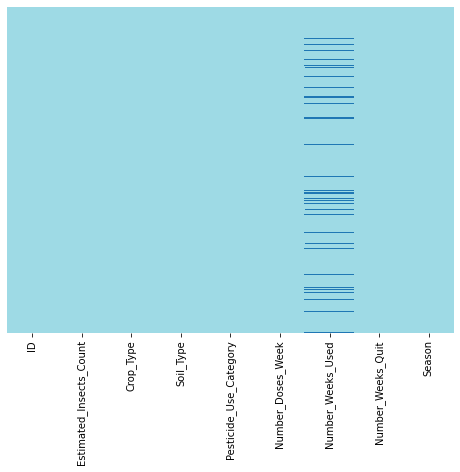

In [26]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='tab20_r')
plt.show()

# Treating Null Value

In [27]:
df1.dropna(subset=["Number_Weeks_Used"],axis=0,inplace=True)

In [28]:
df1.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [30]:
df2.shape

(1199, 9)

# Statistics

In [32]:
df2.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1080.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.782083,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,28.000000,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,38.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


In [33]:
df2.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,0.020773,-0.339516,0.038259,-0.121168,0.521308,0.146441,0.023384
Crop_Type,0.020773,1.000000,0.063050,0.482378,-0.170014,0.065865,-0.390935,0.020282
Soil_Type,-0.339516,0.063050,1.000000,0.129857,0.057118,-0.146997,-0.191989,-0.069242
Pesticide_Use_Category,0.038259,0.482378,0.129857,1.000000,-0.010922,0.430351,-0.584312,0.015085
Number_Doses_Week,-0.121168,-0.170014,0.057118,-0.010922,1.000000,0.129941,0.009077,0.027197
Number_Weeks_Used,0.521308,0.065865,-0.146997,0.430351,0.129941,1.000000,-0.380721,0.019353
Number_Weeks_Quit,0.146441,-0.390935,-0.191989,-0.584312,0.009077,-0.380721,1.000000,0.030281
Season,0.023384,0.020282,-0.069242,0.015085,0.027197,0.019353,0.030281,1.000000


# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x05DEC8C8>,
      dtype=object)

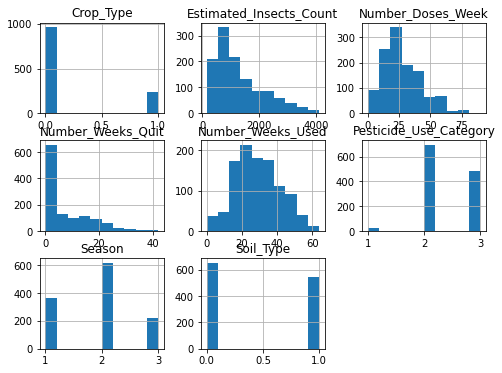

In [34]:
df2.hist()

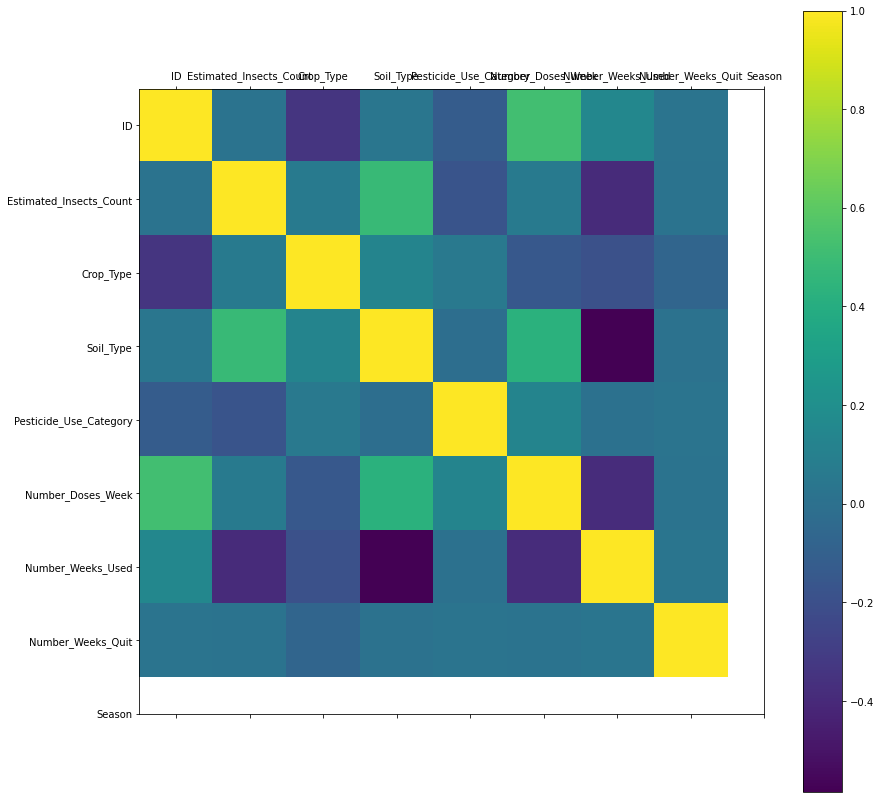

In [35]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 14
plt.matshow(df2.corr())
plt.yticks(np.arange(df2.shape[1]), df2.columns)
plt.xticks(np.arange(df2.shape[1]), df2.columns)
plt.colorbar()